$\newcommand{\TirName}[1]{\text{#1}}
\newcommand{\inferrule}[3][]{
  \let\and\qquad
  \begin{array}{@{}l@{}}
  \TirName{#1}
  \\
  \displaystyle
  \frac{#2}{#3}
  \end{array}
}
\newcommand{\infer}[3][]{\inferrule[#1]{#2}{#3}}
$

# Meeting 12 - Functions and Dynamic Scoping

Bor-Yuh Evan Chang  
Thursday, October 3, 2024

<!-- 3 Expressions -->

<!-- 4 Binding and Scope -->

<!-- 8 Recursion -->

<!-- 9 Inductive Data Types -->

<!-- 11 Concrete Syntax -->

<!-- 12 Abstract Syntax and Parsing -->

<!-- 13 Exercise: Syntax -->

<!-- 14 Static Scoping -->

<!-- 15 Judgments -->

<!-- 16 Variables, Basic Values, and Judgments Lab -->

<!-- 18 Operational Semantics -->

<!-- 19 Functions and Dynamic Scoping -->

<!-- 20 Big-Step Exercise -->

<!-- 21 Evaluation Order  -->

<!-- Static Typing -->

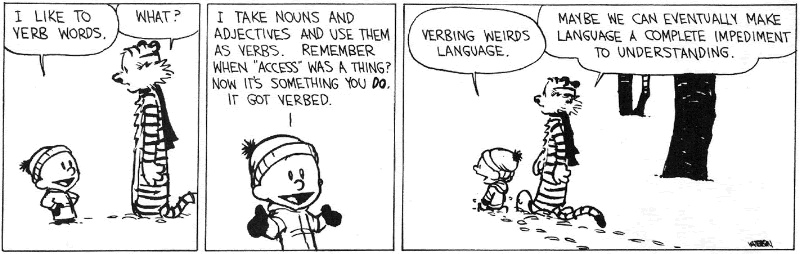

What questions does your neighbor have?

[ In-Class Slides](in-class/meeting12-dynamic-scoping.pdf)<br/> [
In-Class Jupyter](in-class/meeting12-dynamic-scoping.ipynb)<br/> [ Book
Chapter](https://csci3155.cs.colorado.edu/pppl-course/book/dynamic-scoping.html)

## Announcements

-   HW1 scores released
-   Review with Peer on Unit 2 Thu-Fri Oct 3-4 to prepare for exam
-   HW3 due Monday 6pm
-   Exam on Units 1-2 next Tue Oct 8
    -   50 minutes in class
    -   Accommodation letters confirmed (some weeks ago)?
        -   Look out for note on Piazza about the extended-time location
        -   During class time
-   Accelerated section enrollment

## Today

-   [Functions and Dynamic
    Scoping](https://csci3155.cs.colorado.edu/pppl-course/book/dynamic-scoping.html)
-   Triage Your Questions
    -   HW3?
-   Revisit Operational Semantics

## Questions?

-   Preview:
    -   What is static versus dynamic scoping?
-   Review:
    -   What is the correspondence between judgment forms/inference
        rules/judgments and code?
    -   What is a *big-step operational semantics*?

## Questions?

## Functions Are Values

In [2]:
trait Expr                                                       // e
case class N(n: Double) extends Expr                             // e ::= n
case class Var(x: String) extends Expr                           // e ::= x
case class ConstDecl(x: String, e1: Expr, e2: Expr) extends Expr // e ::= const x = e1; e2

defined trait Expr 
defined class N 
defined class Var 
defined class ConstDecl

<span id="eq-grammar-javascripty-functions">$$
\begin{array}{rrrll}
\text{values} & v& \mathrel{::=}& \texttt{(}x\texttt{)} \mathrel{\texttt{=}\!\texttt{>}} e_1
\\
\text{expressions} & e& \mathrel{::=}& e_1\texttt{(}e_2\texttt{)}
\\
\text{variables} & x
\end{array}
 \qquad(1)$$</span>

In [3]:
case class Fun(x: String, e1: Expr) extends Expr // e ::= (x) => e1
case class Call(e1: Expr, e2: Expr) extends Expr // e ::= e1(e2)

defined class Fun 
defined class Call

In [4]:
def isValue(e: Expr): Boolean = ???

defined function isValue

In [5]:
type Env = Map[String, Expr]

case class DynamicTypeError(e: Expr) extends Exception {
  override def toString: String = s"TypeError: in expression $e"
}

defined type Env 
defined class DynamicTypeError

``` scala
val empty: Env = Map.empty
def lookup(env: Env, x: String): Expr = env(x)
def extend(env: Env, x: String, v: Expr): Env = {
  require(isValue(v))
  env + (x -> v)
}
```

<pre><span class="ansi-cyan-fg">empty</span>: <span class="ansi-green-fg">Env</span> = <span class="ansi-yellow-fg">Map</span>()
defined <span class="ansi-green-fg">function</span> <span class="ansi-cyan-fg">lookup</span>
defined <span class="ansi-green-fg">function</span> <span class="ansi-cyan-fg">extend</span></pre>

# Dynamic Scoping

## Rule

$$
\inferrule[EvalCall]{
  ???
}{
  E \vdash e_1\texttt{(}e_2\texttt{)} \Downarrow v'
}
$$

We first try to implement function call in the most straightforward way.
What we will discover is that we have made a historical mistake and have
ended up with a form of dynamic scoping.

We extend the definition of the evaluation judgment form for function
call $e_1\texttt{(}e_2\texttt{)}$ with the $\TirName{EvalCall}$ rule in
the most direct way.

$\fbox{$E \vdash e \Downarrow v$}$

$\inferrule[EvalCall]{
  E \vdash  e_1  \Downarrow \texttt{(}x\texttt{)} \mathrel{\texttt{=}\!\texttt{>}} e' 
  \and
  E \vdash  e_2  \Downarrow v_2 
  \and
   E[\mathop{}x \mapsto v_2]  \vdash  e'  \Downarrow v' 
}{
  E \vdash 
    e_1\texttt{(}e_2\texttt{)}
   \Downarrow v' 
}$

## Implementation

In [7]:
def eval(env: Env, e: Expr): Expr = ???

defined function eval

``` scala
def eval(env: Env, e: Expr): Expr = e match {
  // EvalVal
  case v if isValue(e) => v
  // EvalVar
  case Var(x) => lookup(env, x)
  // EvalConstDecl
  case ConstDecl(x, e1, e2) => {
    val v1 = eval(env, e1)
    eval(extend(env, x, v1), e2)
  }
  // EvalCall
  case Call(e1, e2) => eval(env, e1) match {
    case Fun(x, e) => {
      val v2 = eval(env, e2)
      eval(extend(env, x, v2), e)
    }
    case _ => throw DynamicTypeError(e)
  }
}
```

<pre>defined <span class="ansi-green-fg">function</span> <span class="ansi-cyan-fg">eval</span></pre>

## Dynamic Type Error

``` scala
eval(empty, Call(N(1), N(2)))
```

<pre><span class="ansi-red-fg">scala.NotImplementedError: an implementation is missing</span>
  scala.Predef$.$qmark$qmark$qmark(<span class="ansi-green-fg">Predef.scala</span>:<span class="ansi-green-fg">345</span>)
  ammonite.$sess.cmd2$Helper.isValue(<span class="ansi-green-fg">cmd2.sc</span>:<span class="ansi-green-fg">1</span>)
  ammonite.$sess.cmd6$Helper.eval(<span class="ansi-green-fg">cmd6.sc</span>:<span class="ansi-green-fg">3</span>)
  ammonite.$sess.cmd7$Helper.&lt;init&gt;(<span class="ansi-green-fg">cmd7.sc</span>:<span class="ansi-green-fg">1</span>)
  ammonite.$sess.cmd7$.&lt;clinit&gt;(<span class="ansi-green-fg">cmd7.sc</span>:<span class="ansi-green-fg">7</span>)</pre>

## Instrumented Implementation

In [10]:
def eval(level: Int, env: Env, e: Expr): Expr = {
  val indent = " " * level
  val v = e match {
    // EvalVal
    case v if isValue(e) => {
      println(s"\n${indent}------------------------ EvalVal")
      v
    }
    // EvalVar
    case Var(x) => {
      val v = lookup(env, x)
      println(s"\n${indent}------------------------ EvalVar")
      v
    }
    // EvalConstDecl
    case ConstDecl(x, e1, e2) => {
      val v1 = eval(level, env, e1)
      val v2 = eval(level + 6, extend(env, x, v1), e2)
      println(s"${indent}------------------------ EvalConstDecl")
      v2
    }
    // EvalCall
    case Call(e1, e2) => {
      eval(level, env, e1) match {
        case Fun(x, e) => {
          val v2 = eval(level + 4, env, e2)
          val v = eval(level + 8, extend(env, x, v2), e)
          println(s"${indent}------------------------ EvalCall")
          v
        }
        case _ => throw DynamicTypeError(e)
      }
    }
  }
  println(s"${indent}$env ⊢ $e ⇓ $v")
  v
}

def eval(e: Expr): Expr = eval(0, empty, e)

defined function eval 
defined function eval

``` scala
eval( Call(Fun("x", Var("x")), N(2)) )
```

<pre><span class="ansi-red-fg">scala.NotImplementedError: an implementation is missing</span>
  scala.Predef$.$qmark$qmark$qmark(<span class="ansi-green-fg">Predef.scala</span>:<span class="ansi-green-fg">345</span>)
  ammonite.$sess.cmd2$Helper.isValue(<span class="ansi-green-fg">cmd2.sc</span>:<span class="ansi-green-fg">1</span>)
  ammonite.$sess.cmd8$Helper.eval(<span class="ansi-green-fg">cmd8.sc</span>:<span class="ansi-green-fg">5</span>)
  ammonite.$sess.cmd8$Helper.eval(<span class="ansi-green-fg">cmd8.sc</span>:<span class="ansi-green-fg">39</span>)
  ammonite.$sess.cmd9$Helper.&lt;init&gt;(<span class="ansi-green-fg">cmd9.sc</span>:<span class="ansi-green-fg">1</span>)
  ammonite.$sess.cmd9$.&lt;clinit&gt;(<span class="ansi-green-fg">cmd9.sc</span>:<span class="ansi-green-fg">7</span>)</pre>

## Test Case

In [ ]:
???

``` typescript
const x = 1;
const g = (y) => x;
((x) => g(2))(3)
```

## Dynamic Scoping

In [12]:
val e_dynamicScoping =
  ConstDecl("x", N(1),
  ConstDecl("g", Fun("y", Var("x")),
  Call(Fun("x", Call(Var("g"), N(2))), N(3))))

e_dynamicScoping : ConstDecl = ConstDecl (
 x = "x" ,
 e1 = N (n = 1.0 ),
 e2 = ConstDecl (
 x = "g" ,
 e1 = Fun (x = "y" , e1 = Var (x = "x" )),
 e2 = Call (
 e1 = Fun (x = "x" , e1 = Call (e1 = Var (x = "g" ), e2 = N (n = 2.0 ))),
 e2 = N (n = 3.0 )
 )
 )
)

In [13]:
val v_dynamicScoping = eval(e_dynamicScoping)

# Fixing Dynamic Scoping

## Closures

    expressions e ::= 
    values      v ::=
    variables   x

In [14]:
???

-   The example that exhibits dynamic scoping suggests some possible
    fixes to implement static scoping.
-   We observe that a free variable use in a function body references a
    variable binding at the time the function is defined, not when the
    function body is evaluated.
-   This suggests that a function body should be evaluated in the value
    environment when it is defined.

$$
\begin{array}{rrrll}
\text{expressions} & e& \mathrel{::=}&
\texttt{(}x\texttt{)} \mathrel{\texttt{=}\!\texttt{>}} e_1
\mid e_1\texttt{(}e_2\texttt{)}
\\
\text{values} & v& \mathrel{::=}& \texttt{(}x\texttt{)} \mathrel{\texttt{=}\!\texttt{>}} e_1[E]
\\
\text{variables} & x
\end{array}
$$

``` scala
case class Closure(fun: Fun, env: Env) extends Expr // e ::= (x) => e1[E]

def isValue(e: Expr): Boolean = e match {
  case N(_) | Closure(_, _) => true
  case _ => false
}

type Env = Map[String, Expr]
val empty: Env = Map.empty
def lookup(env: Env, x: String): Expr = env(x)
def extend(env: Env, x: String, v: Expr): Env = {
  require(isValue(v))
  env + (x -> v)
}
```

<pre>defined <span class="ansi-green-fg">class</span> <span class="ansi-cyan-fg">Closure</span>
defined <span class="ansi-green-fg">function</span> <span class="ansi-cyan-fg">isValue</span>
defined <span class="ansi-green-fg">type</span> <span class="ansi-cyan-fg">Env</span>
<span class="ansi-cyan-fg">empty</span>: <span class="ansi-green-fg">Env</span> = <span class="ansi-yellow-fg">Map</span>()
defined <span class="ansi-green-fg">function</span> <span class="ansi-cyan-fg">lookup</span>
defined <span class="ansi-green-fg">function</span> <span class="ansi-cyan-fg">extend</span></pre>

## Rules

$$
\inferrule[EvalFun]{
  ???
}{
  E \vdash \texttt{(}x\texttt{)} \mathrel{\texttt{=}\!\texttt{>}} e \Downarrow  \texttt{(}x\texttt{)} \mathrel{\texttt{=}\!\texttt{>}} e [ E ]
}
$$

$$
\inferrule[EvalCall]{
  ???
}{
  E \vdash e_1\texttt{(}e_2\texttt{)} \Downarrow v'
}
$$

$\fbox{$E \vdash e \Downarrow v$}$

$\inferrule[EvalFun]{
}{
  E \vdash 
    \texttt{(}x\texttt{)} \mathrel{\texttt{=}\!\texttt{>}} e
   \Downarrow
     \texttt{(}x\texttt{)} \mathrel{\texttt{=}\!\texttt{>}} e [ E]
  {
  }
}$

$\inferrule[EvalCall]{
  E \vdash  e_1  \Downarrow \texttt{(}x\texttt{)} \mathrel{\texttt{=}\!\texttt{>}} e'[E'] 
  \and
  E \vdash  e_2  \Downarrow v_2 
  \and
   E'[\mathop{}x \mapsto v_2]  \vdash  e'  \Downarrow v' 
}{
  E \vdash 
    e_1\texttt{(}e_2\texttt{)}
   \Downarrow v' 
}$

## Implementation

In [16]:
???

``` scala
def eval(env: Env, e: Expr): Expr = e match {
  // EvalVal
  case v if isValue(e) => v
  // EvalVar
  case Var(x) => lookup(env, x)
  // EvalConstDecl
  case ConstDecl(x, e1, e2) => {
    val v1 = eval(env, e1)
    eval(extend(env, x, v1), e2)
  }
  // EvalFun
  case f @ Fun(x, e) => Closure(f, env)
  // EvalCall
  case Call(e1, e2) => eval(env, e1) match {
    case Closure(Fun(x, e_), env_) => {
      val v2 = eval(env, e2)
      eval(extend(env_, x, v2), e_)
    }
    case _ => throw DynamicTypeError(e)
  }
}

val v_dynamicScopingFixed = eval(empty, e_dynamicScoping)
```

<pre>defined <span class="ansi-green-fg">function</span> <span class="ansi-cyan-fg">eval</span>
<span class="ansi-cyan-fg">v_dynamicScopingFixed</span>: <span class="ansi-green-fg">Expr</span> = <span class="ansi-yellow-fg">N</span>(n = <span class="ansi-green-fg">1.0</span>)</pre>